Question 1

1.) create a list of consecutive integers [2, ..., n].
2.) let p = 2
3.) mark all the numbers 2p, 3p, 4p, ..., mp $\leg$ n as not primes.
4.) Find the smallest number greater than p which is  not marked, say q, and set p = q and repeat step c.
5.) Algorithm terminates when q > n

A. write a function that implements this algorithm
B. run the program
C. get primes up to 10million
D. use time command to compute the time required for primes up to 1k, 10k, 100k, 1m, 10m and plot the times vs n.
E. how can code be improved?
The code  can currently only reach n = 100,000 and takes an exponential amount of time. This is due to 2 factors. 1.) my if statement is inside the for loop, and 2.) that same if statement is dividing which is computationally limiting. 
To fix this, I would have to change the way of approaching finding factors of the test value, as well as re work the code into taking the if statement outside the for loop. While looking for ways to do this, I stumbled onto Stack Exchange and found a code that uses Booleans. So I give credit to them for their method. 


totaltime0.0
[2, 3, 5, 7]
totaltime0.0
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
totaltime2.99072265625
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
totaltime226.39751434326172
[

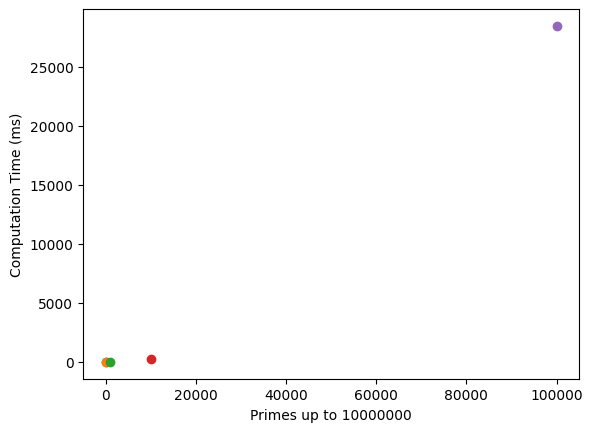

calculating primes up to 10
calculating primes up to 100
calculating primes up to 1000
calculating primes up to 10000
calculating primes up to 100000
calculating primes up to 1000000
calculating primes up to 10000000


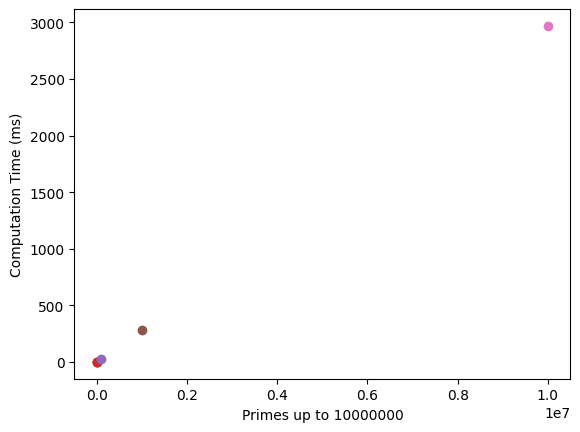

In [9]:
import time
import matplotlib.pyplot as plt


def primes(n):                                  # A. function
    """
    :param n: integer
    :return: tuple{item - list, float - time}
    """
    begin_time = time.time()                    # D. start time
    integerList = [] # sets an empty list
    for index in range(2, n+1):
        integerList.append(index)               # a. list of  numbers from 2 ... n
    p = 2                                       # b. set starting point
    
    def elimination(test, list): 
        inv_test = 1/test
                                                # c. marking non-primes recursively
        p_index = list.index(test)               
        p_max_index = list.index(list[-1])      # gets index range for computation
        mult = []                               # sets empty list for to be popped values
        for i in range(p_index + 1 , p_max_index+1): 
                    # indices ignoring the test value: hence p_index + 1
            if list[i] % test == 0:             
                mult.append(list[i])            # if no remainder, append to mult to be popped (this is computationally heavy)
            else:
                continue 
                
        if len(mult) == 0:
            prime_list = list                    # e. if no multiples found, terminates and outputs primes
            end_time = time.time()
            compute_time = (end_time - begin_time) * 1000
            print(f'totaltime{compute_time}')
            plt.scatter(n, compute_time)
            prime_time = prime_list, compute_time
            print(prime_list)
            return prime_time                   # outputs final list, and time it took D.
        else:
            for i in mult:                      # if multiples found, pop them off the list
                enu = list.index(i) # 
                list.pop(enu)
            new_list = list                     # reassigned reduced list
            #print(new_list)                    # prints a reduced list (optional)
            new_test = list[(list.index(test) + 1)]   # d. advances test index to next index in reduced list
            elimination(new_test, new_list)           # inputs advanced index and reduced list for recursion
            
    return elimination(p, integerList) 


def primes_revisited(n):
    # using booleans (True/False) is easier for the computer to check
    # note I found this method on Stack Exchange while trying to find ways to reduce to stress on the computer.
    prime_values = [True for item in range(n+1)]    # makes a list of True values
    p0 = 2                                          # initial p
    
    while p0**2 <= n:
        if prime_values[p0] == True:                # checks if the element is True
            for element in range(p0**2, n+1, p0):   # make a range of values which correspond to the multiples of p0
                prime_values[element] = False       # sets those multiples as False
        p0 += 1                                     # updates p
    prime_list = []   
    for prime in range(2, n+1):                     # takes the whole range of values
        if prime_values[prime]:                     # only looks at True valued indices
            prime_list.append(prime)                # appends True values to list
    
    return prime_list                               # outputs list of primes
    
if __name__ == '__main__':
    m = [10, 100, 1000, 10_000, 100_000] #, 1_000_000, 10_000_000]     # B. run command(s)
    n = [10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]
    for i in m:
        primes(i)
        
        #plt.plot(n, prime_time_list[1])
    plt.xlabel(f'Primes up to {n[-1]}')
    plt.ylabel(f'Computation Time (ms)')
    plt.title("Recursive Approach")
    plt.show()
    
    for i in n:
        begin_time = time.time()
        print(f'calculating primes up to {i}')
        primes = primes_revisited(i)
        #primes(i)
        #print(type(prime_time_list))
        #print(prime_time_list)
        #print(prime_time_list[0], prime_time_list[1])
        end_time = time.time()
        compute_time = (end_time - begin_time) * 1000  # ms
        plt.scatter(i, compute_time)
        #plt.plot(n, prime_time_list[1])
    plt.xlabel(f'Primes up to {n[-1]}')
    plt.ylabel(f'Computation Time (ms)')
    plt.title("Boolean Approach")
    plt.show()
    
   

Question 2

The following differential equations are given:
$$\frac{d^2x}{dt^2} = -b\frac{dx}{dt}$$
$$\frac{d^2y}{dt^2} = -g - b\frac{dy}{dt}$$

variables:
air resistence: $-\beta\vec{v}$
velocity: $\vec{v}$
coefficient of air resistence: $\beta$ in $kg\cdot Hz$
mass: $m$

We can write the frequency in $Hz$ as the following: $b = \frac{\beta}{m}$

A. write the equations in dimensionless form

$\dot{x} = v_x$, $\dot{y} = v_y$, $\dot{v_x} = -bv_x$, $\dot{v_y} = -g - bv_y$

$x = \chi x'$, $y = \chi y'$, $t = \tau t'$, $v_x = v_0v_x'$, $v_y = v_0v_x'$

$$\frac{v_0}{\tau}\dot{v_x'} = -bv_ov_x'$$ $$\frac{v_0}{\tau}\dot{v_y'} = -g - bv_ov_y'$$ $$\frac{\chi}{\tau}\dot{x} = v_0v_x'$$ $$\frac{\chi}{\tau}\dot{y} = v_0v_y'$$

$\xi_0' = \bigg[-v_x', -(1 + v_y'), v_x', v_y'\bigg]$

$$\xi'_{n+1} = \xi_n' + \zeta(\xi', t)dt$$

B. write a code that solves the dif-eq as an initial value problem with Euler's Method ($x_0$, $y_0$, $v_0$, $\theta_0$) for $\theta$ measure at the horizon
C. Express answer in SI units and plot them using values of $b = (0.0, 0.2, 0.5, 1.0, 2.0, 5.0, 10)$ on the same plot
D. Discuss your choice of algorithm and methods. How would you improve performance? Make it user-friendly

Using Euler method to evolve a trajectory is adequate enough for the general shape of a parabolic path. This recursivly updates the positions and velocities within the given number of points. The timescale and gravity are held constant as to make the code look cleaner, however making them parameters may allow for easier tinkering with various timesteps and accelerations. The Euler code is outside the projectile function for this reason for calling different timesteps and gravity constants as well as potential different air resistence values. Non-dimensionalizing the values and re dimensionalizing them at the end allows for less computational power.

Ways to improve the code, may be to compact variables into other lines of code, however I think have a variable defined in this way allows the user to change and manipulate the code easier. Especially in the case of the func defined in Euler for our particular scenario. Depending on the problem, introducing a "check" statement to stop the trajectory could also be implemented. That is, if the starting height is 0, the trajectory will terminate if a new height is less than 0 (or at any other ground level). Making an array for time would also be beneficial as to analyze how different qualities evolve over time.

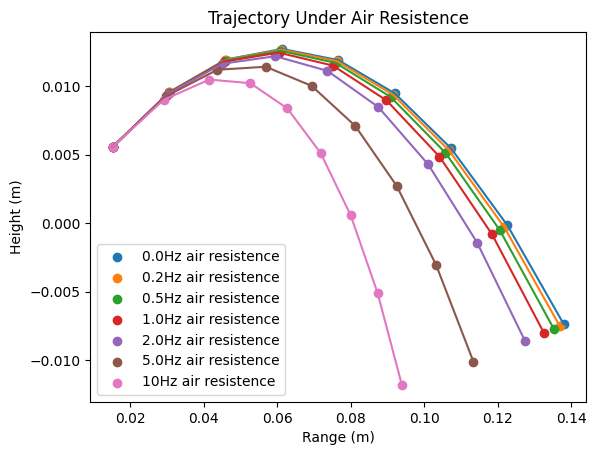

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def euler(dimless_data_array, b, g, dt):
    """
    x0 = x0 + v0x*dt
    y0 = y0 + v0y*dt
    v0x = v0x - (res*x0) * dt
    v0y = v0y - (g - res*y0) * dt
    """
    # func = [v0x, v0y, -b*v0x, -g-b*v0y]
    func = np.array([dimless_data_array[2], dimless_data_array[3], -b*dimless_data_array[2], -g-b*dimless_data_array[3]])
    
    dimless_data_array = dimless_data_array + func * dt
    #print(dimless_data_array)
    return dimless_data_array
    

def projectile(x0, y0, v0, initial_angle, b, no_pts):
    # setup
    g = 9.81
    t0 = 0
    dt = 0.01
    tau = v0/g # units of sec
    chi = v0 * tau # units of m
    x0 = x0/chi
    y0 = y0/chi
    v0x = np.cos(np.radians(initial_angle))
    v0y = np.sin(np.radians(initial_angle))
    dimless_initial_data = np.array([x0, y0, v0x, v0y]) # x0 y0 v0x v0y
    
    # getting updated data
    plot_array = []
    for pt in range(1, no_pts): 
        dimless_initial_data = euler(dimless_initial_data, b, g, dt)
        plot_array.append(dimless_initial_data) # appends dimensionless data
        t0 += dt
        
    # grabbing data to plot and re-dimensionalizing them
    x_values = []
    y_values = []
    for array in range(no_pts-1):
        plot_array[array][0] = plot_array[array][0]*chi  # units to x
        plot_array[array][1] = plot_array[array][1]*chi  # units to y
        plot_array[array][2] = plot_array[array][2]*v0  # units to vx
        plot_array[array][3] = plot_array[array][3]*v0  # units to vy
        x_values.append(plot_array[array][0])
        y_values.append(plot_array[array][1])
        #plt.scatter(plot_array[array][0], plot_array[array][1])
    #print(plot_array)
    return x_values, y_values #plot_array


if __name__=='__main__':
    # initial conditions
    b = [0.0, 0.2, 0.5, 1.0, 2.0, 5.0, 10]
    # single projectile
    """
    b = 0.0
    x, y = projectile(0.0, 0.0, 4.0, 45, b, 15)
    plt.scatter(x, y, label=f'{b}Hz air resistence')
    plt.plot(x, y)
    """
    # get trajectory for each b
    for i in b:
        x, y  = projectile(0.0, 0.0, 4.0, 20, i, 10) #array (play around with inputs)
        plt.scatter(x, y, label=f'{i}Hz air resistence')
        plt.plot(x, y)     
    plt.title("Trajectory Under Air Resistence")
    plt.xlabel("Range (m)")
    plt.ylabel("Height (m)")
    plt.legend()
    plt.show()

Question 3


The Associated Legendre Dif-Eq is given by:

$$(1-x^2)\frac{d^2y_{n, m}(x)}{dx^2} - 2x\frac{dy_{n, m(x)}}{dx} + \bigg[n(n + 1) - \frac{m^2}{1 - x^2}\bigg]y_{n, m}(x) = 0$$
Boundary Conditions:

$y_{n, 0}(1.0) = 1.0$, $y_{n, 0}(-1) = \pm 1$ based on if n is even or odd
and
$y_{n, m}(1.0) = y_{n, m}(-1.0) = 0.0$ for $m > 0$


A. Using the code for general second order linear differential equations, set up and solve the Associated Legendre Dif-Eq for the given boundary on the domain [-1, 1] for $n = (1, 2, 3, 4, 5, 6)$, and $m = (0, 1, 2)$ for $0 \leq m \leq n$.

B. Plot your answers and compare them to analytically calculated Associated Legendre polynomials

HINT: (there is a singularity you need to worry about. Look into dealing with this)

The singularity at $\pm 1$ causes errors in $m = 1$, and $m = 2$
Resolution, isolate $y''$:
$$y''(x) - \frac{2x}{(1 - x^2)}y'(x) + \bigg[\frac{n(n + 1)}{(1 - x^2)} - \frac{m^2}{(1 - x^2)^2}\bigg]y(x) = 0$$

Let $x = \pm 1 + z$ for $z << 1$ such that $1 - x^2 = \mp2z$

Substituting into the original:
$$(\mp2z)y''(x) - 2(\pm1 + z)y'(x) + \bigg[n(n + 1) - \frac{m^2}{\mp2z}\bigg]y(x) = 0$$

$\frac{m^2}{\mp2z}$ diverges, taking $n(n + 1)$ to $0$ in the third term, and $z << 1$ in the second term. 

$$(\mp2z)y''(x) \mp 2y'(x) \pm \bigg[\frac{m^2}{2z}\bigg]y(x) = 0$$

Multiplying by $\frac{\mp z}{2}$ we recover an Euler Equation

$$z^2y''(x) + zy'(x) - \bigg[\frac{m^2}{4}\bigg]y(x) = 0$$

Solving this, we end with an approximate solution:
$$y(x) = z^{\pm m / 2}$$

The general solution then should have the form:

$$y(x) = (1 - x^2)^{\pm m / 2}v(x)$$

Rewriting the Polynomial in terms of $v(x), v'(x), v''(x)$ gives us:

$$(1 - x^2)v''(x) - 2x(m + 1)v'(x) + (n(n + 1) - m(m + 1))v(x)$$

Thus we use the coefficients to rid us of the singularity
coef1: $$(1 - x^2)$$
coef2: $$(2x(m + 1))$$
coef3: $$(n(n + 1) - m(m + 1))$$

Using the solution to this differential equation, we can solve for $y(x)$

In the case of this solution, we are off by an arbitrary constant that can be modified in the if-main block.



x_vals[-1.         -0.98993025 -0.97988025 -0.96983023 -0.9597802  -0.94973017
 -0.93968013 -0.92963009 -0.91958005 -0.90953001 -0.89947996 -0.88942992
 -0.87937987 -0.86932983 -0.85927978 -0.84922973 -0.83917968 -0.82912964
 -0.81907959 -0.80902954 -0.79897949 -0.78892944 -0.77887939 -0.76882934
 -0.75877929 -0.74872924 -0.73867918 -0.72862913 -0.71857908 -0.70852903
 -0.69847898 -0.68842893 -0.67837887 -0.66832882 -0.65827877 -0.64822872
 -0.63817867 -0.62812861 -0.61807856 -0.60802851 -0.59797845 -0.5879284
 -0.57787835 -0.5678283  -0.55777824 -0.54772819 -0.53767814 -0.52762808
 -0.51757803 -0.50752797 -0.49747792 -0.48742787 -0.47737781 -0.46732776
 -0.45727771 -0.44722765 -0.4371776  -0.42712754 -0.41707749 -0.40702743
 -0.39697738 -0.38692733 -0.37687727 -0.36682722 -0.35677716 -0.34672711
 -0.33667705 -0.326627   -0.31657694 -0.30652689 -0.29647683 -0.28642678
 -0.27637672 -0.26632667 -0.25627661 -0.24622656 -0.2361765  -0.22612645
 -0.21607639 -0.20602634 -0.19597628 -0.185926

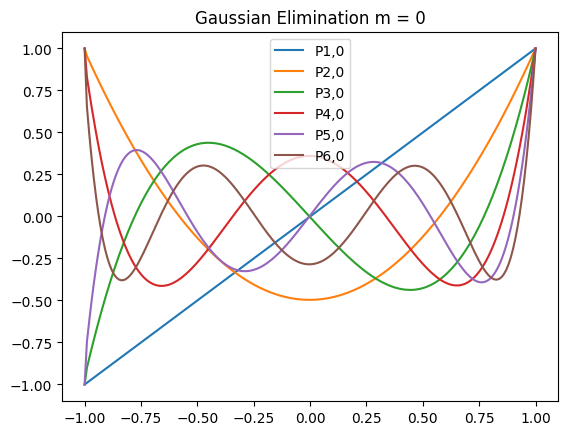

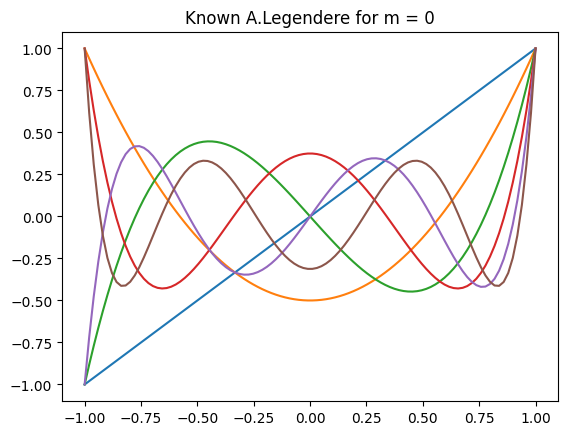

x_vals[-1.          0.9999999   0.99999992  0.99999993  0.99999993  0.99999994
  0.99999994  0.99999994  0.99999994  0.99999994  0.99999994  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995  0.99999995
  0.99999995  0.99999995  0.99999995  0.99999

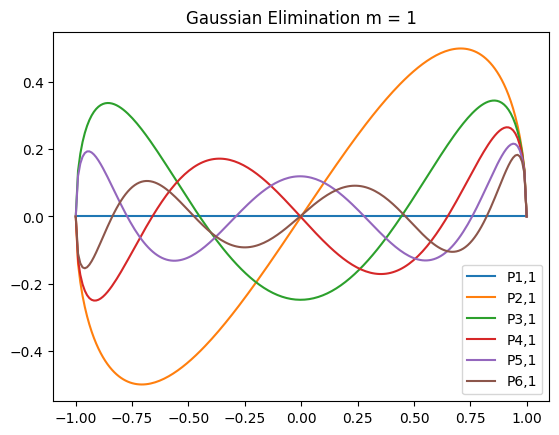

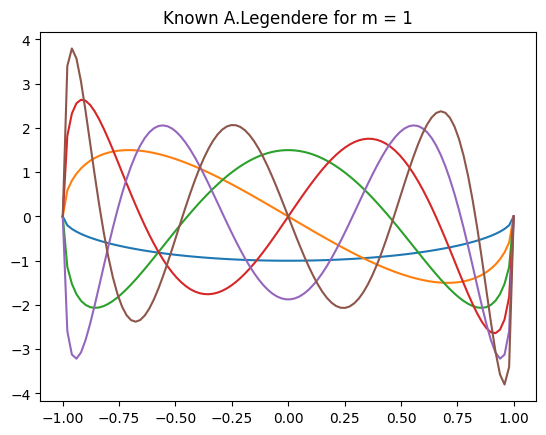

x_vals[1.         0.99999998 0.99999999 0.99999999 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.   

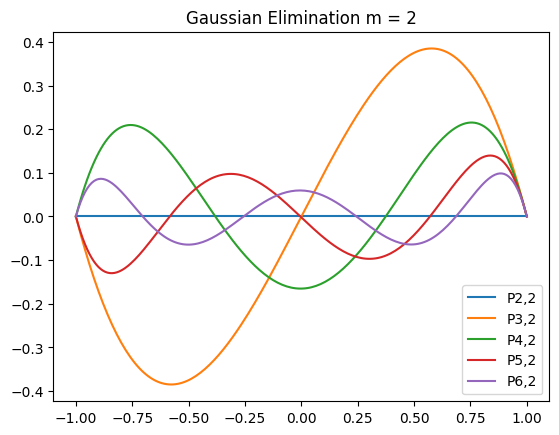

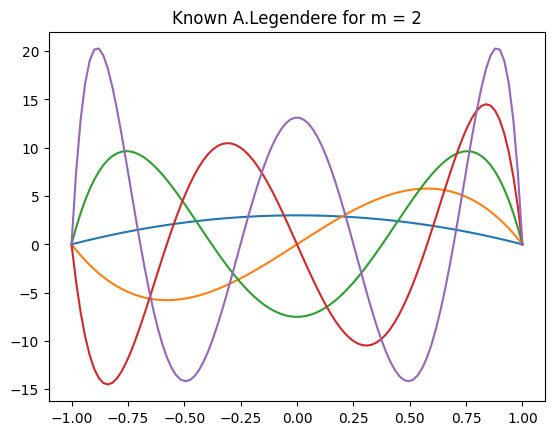

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# get values associated with each polynomial separately for graphing convenience
"""
Plan:
associated(n, m) -> general_linear solver(start_bound+eps, end_bound-eps, no_pts, p(x), q(x), r(x), s=0, bc = {N-1:1.0} if, else.) -> gaussian elimination(matrix, b_vector) -> upper_triangle(matrix, b_vaector) -> back_substitution(matrix)

"""
def echelon_triangularization(matrix, vector):
    tri_mat = np.column_stack((matrix, vector))
    for i in range(len(tri_mat)):
        if tri_mat[i][i] == 0:
            if i < len(tri_mat) - 1:
                for k in range(len(tri_mat)):
                    mat = tri_mat[i][k]
                    tri_mat[i][k] = tri_mat[i+1][k]
                    tri_mat[i+1][k] = mat
        else:
            diag = tri_mat[i][i]
            for k in range(i+1, len(tri_mat)):
                tri_mat[k] = tri_mat[k] - tri_mat[i]*tri_mat[k][i]/diag
    return tri_mat
                    

def back_substitution(triangular_matrix, fixed=None):
    term = len(triangular_matrix)
    x_val = np.zeros(term)
    x_val[term-1] = triangular_matrix[term - 1][term]/triangular_matrix[term - 1][term - 1] 
    
    if fixed != None:
        for i in fixed:
            if i == term - 1:
                x_val[term - 1] = fixed[i]
         
    for j in range(term-2, -1, -1):
        s = 0
        for k in range(j+1, term):
            s += triangular_matrix[j][k] * x_val[k]
        s = triangular_matrix[j][term] - s
        
        s /= triangular_matrix[j][j]
        x_val[j] = s
        
        if fixed != None:
            for i in fixed:
                if i == j:
                    x_val[j] = fixed[i]
    print(f'x_vals{x_val}')
    return x_val


def gaussian_elimination(matrix, vector, fixed=None):
    upper_echelon_matrix = echelon_triangularization(matrix, vector) 
    #print(f'mat={upper_echelon_matrix}')
    return back_substitution(upper_echelon_matrix, fixed) # fixed is not None, it is bc in general_linear_solver


def general_linear_solver(start_bound, end_bound, N, coef1, coef2, coef3, bc):
    step = (end_bound - start_bound) / (N - 1)
    square_step = step**2
    dif_matrix = np.zeros((N, N))
    b_vector = np.zeros(N)
    x_array = np.zeros(N)
    
    for pt in range(N):
        x_array[pt] = start_bound + step * pt
        dif_matrix[pt][pt] = -2*coef1(x_array[pt]) - coef2(x_array[pt])*step + coef3(x_array[pt])*square_step
        try:
            dif_matrix[pt][pt + 1] = coef1(x_array[pt]) + coef2(x_array[pt])*step
        except Exception as e:
            pass
        
        if pt > 0:
            dif_matrix[pt][pt - 1] = coef1(x_array[pt])
        
    y_array = gaussian_elimination(dif_matrix, b_vector, fixed=bc)
    return x_array, y_array


def associated_legendre(n, m, a0):
    epsillon = 1e-9
    pts = 200
    bc = {pts - 1: 1.0}
    if n % 2 == 0:
        bc.update({0:1.0})
    else:
        bc.update({0:-1.0})
    
    starting_bound = -1.0 + epsillon
    ending_bound = 1.0 - epsillon
    
    px = lambda x: 1 - x**2
    qx = lambda x: -2*x
    rx = lambda x: (n*(n + 1) - m**2/(1 - x**2))
    
    if m != 0:
        px = lambda x: (1 - x**2)
        qx = lambda x: (-2*x)*(m + 1)
        rx = lambda x: (n*(n + 1) - m*(m+1))
    
    
    x_values_of_v, y_values_of_v = general_linear_solver(starting_bound, ending_bound, pts, px, qx, rx, bc)
    y_values_of_y = a0*(1 - x**2)**(m/2)*y_values_of_v
    x_values_of_y = x_values_of_v
    #    return x_values, y_values    
    return x_values_of_y, y_values_of_y


if __name__ == '__main__':
    # arbitrary coefficient
    a0 = 1
    #gaussian test n values
    n = [1, 2, 3, 4, 5, 6]
    # plot known polynomials on domain: x = [-1, 1]
    x_values = np.linspace(-1.0, 1.0, 100)
    
    # gaussian
    for i in n:
        x, y = associated_legendre(i, 0, a0)
        plt.plot(x, y, label=f'P{i},{0}')
    plt.title('Gaussian Elimination m = 0')
    plt.legend()
    plt.show()
    
    # known
    # m = 0
    P10 = []
    P20 = []
    P30 = []
    P40 = []
    P50 = []
    P60 = []
    for x in x_values:
        P10.append(x)
        P20.append(0.5*(3*x**2 - 1))
        P30.append(0.5*(5*x**3 - 3*x))
        P40.append(0.125*(35*x**4 - 30*x**2 + 3))
        P50.append(0.125*(63*x**5 - 70*x**3 + 15*x))
        P60.append(0.0625*(231*x**6 - 315*x**4 + 105*x**2 - 5))
    y_values = [P10, P20, P30, P40, P50, P60]
    for poly in y_values:
        plt.plot(x_values, poly)
    plt.title("Known A.Legendere for m = 0")
    #plt.legend()
    plt.show()
    
    # gaussian
    for i in n:
        x, y = associated_legendre(i, 1, a0)
        plt.plot(x, y, label=f'P{i},{1}')
    plt.title('Gaussian Elimination m = 1')
    plt.legend()
    plt.show()
    
    # known
    # m = 1
    P11 = []
    P21 = []
    P31 = []
    P41 = []
    P51 = []
    P61 = []
    for x in x_values:
        P11.append(-(1-x**2)**0.5)
        P21.append(-3*x*(1-x**2)**0.5)
        P31.append(1.5*(1-5*x**2)*(1-x**2)**0.5)
        P41.append(-2.5*(7*x**3 - 3*x)*(1-x**2)**0.5)
        P51.append(-1.875*(21*x**4-14*x**2+1)*(1-x**2)**0.5)
        P61.append(-2.625*(33*x**5 - 30*x**3 + 5*x)*(1-x**2)**0.5)
    y_values = [P11, P21, P31, P41, P51, P61]
    for poly in y_values:
        plt.plot(x_values, poly)
    plt.title("Known A.Legendere for m = 1")
    #plt.legend()
    plt.show()
    
    m = [2, 3, 4, 5, 6]
    # gaussian
    for i in m:
        x, y = associated_legendre(i, 2, a0)
        plt.plot(x, y, label=f'P{i},{2}')
    plt.title('Gaussian Elimination m = 2')
    plt.legend()
    plt.show()
    
    # known
    # m = 2
    #P12 = []
    P22 = []
    P32 = []
    P42 = []
    P52 = []
    P62 = []
    for x in x_values:
        #P21.append(0)
        P22.append(3*(1-x**2))
        P32.append(15*x*(1-x**2))
        P42.append(7.5*(7*x**2 - 1)*(1-x**2))
        P52.append(52.5*(3*x**3 - x)*(1-x**2))
        P62.append(13.125*(33*x**4 - 18*x**2 + 1)*(1-x**2))
    y_values = [P22, P32, P42, P52, P62]
    for poly in y_values:
        plt.plot(x_values, poly)
    plt.title("Known A.Legendere for m = 2")
    #plt.legend()
    plt.show()
    
    